In [2]:
from functions import *
from methods import *
import seaborn as sns
import matplotlib.pyplot as plt

Using TensorFlow backend.


In [3]:
path = '/Users/irashokar/documents/NOvA/'
with open(path + 'history_32_2_LR_0.0001.pkl','rb') as f1:
    history = pkl.load(f1)

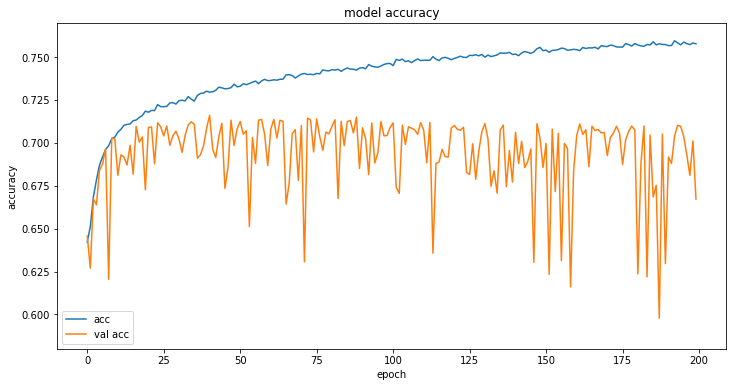

In [4]:
plt.figure(figsize=(12,6))
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['acc', 'val acc'], loc='lower left')
plt.ylim(0.58,0.77)
plt.show()

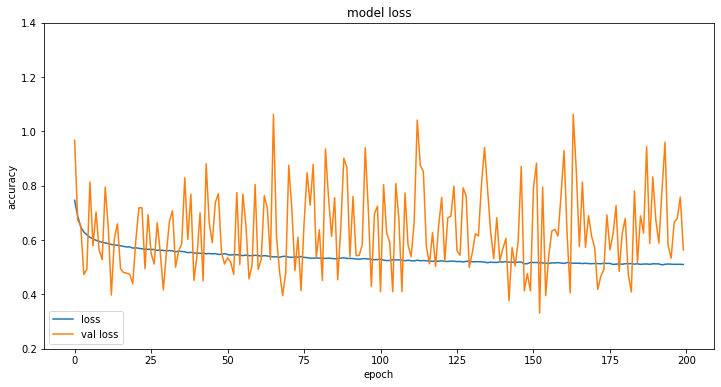

In [5]:
plt.figure(figsize=(12,6))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['loss', 'val loss'], loc='lower left')
plt.ylim(0.2,1.4)
plt.show()

In [6]:
with open(path+ 'probabilities_weights_32_2_LR_0.0001.pkl','rb') as f2:
    probabilities = pkl.load(f2)
    
with open(path+ 'test_labels_list_weights_32_2_LR_0.0001.pkl','rb') as f3:
    test_labels = pkl.load(f3)

In [7]:
len(probabilities)

93248

In [8]:
predictions = []
for i in probabilities:
    max_index =np.where(i == np.max(i))[0][0]
    predictions.append(max_index)
    
test_vals = []
for i in test_labels:
    max_index =np.where(i == np.max(i))[0][0]
    test_vals.append(max_index)

#accuracy
acc = 0
for i in range(len(probabilities)):
    if test_vals[i]==predictions[i]:
        acc+=1
    else:
        pass
acc/=len(test_vals)

true_val = probabilities 

print('Probabilities: \n')
print('Accuracy:{} \n'.format(acc))
for i in range(10):
    print(probabilities[i], '\n')
print('Predictions: \n')
print(predictions[:10], '\n')
print('Truth labels: \n')
print(test_vals[:10])


Probabilities: 

Accuracy:0.6724163807890223 

[0.67239136 0.02277899 0.3048296 ] 

[0.13238437 0.00529652 0.86231905] 

[0.29967874 0.01151793 0.6888033 ] 

[0.02116834 0.00146014 0.9773716 ] 

[0.5111774  0.00752991 0.48129258] 

[0.43684098 0.01415649 0.5490025 ] 

[0.44261235 0.08934419 0.46804357] 

[0.8082579  0.01117395 0.18056816] 

[0.05856198 0.00427873 0.93715924] 

[0.32954264 0.00233001 0.6681274 ] 

Predictions: 

[0, 2, 2, 2, 0, 2, 2, 0, 2, 2] 

Truth labels: 

[0, 2, 2, 2, 2, 2, 2, 0, 2, 2]


Text(0, 0.5, 'Count')

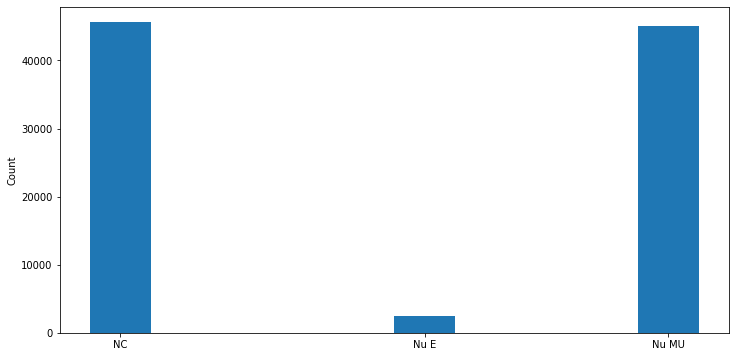

In [9]:
plt.figure(figsize=(12,6))
plt.hist(predictions)
x = [0.1, 1.1, 1.9]
class_names = ['NC', 'Nu E', 'Nu MU']
plt.xticks(x, class_names)
plt.ylabel('Count')

[(0, 1)]

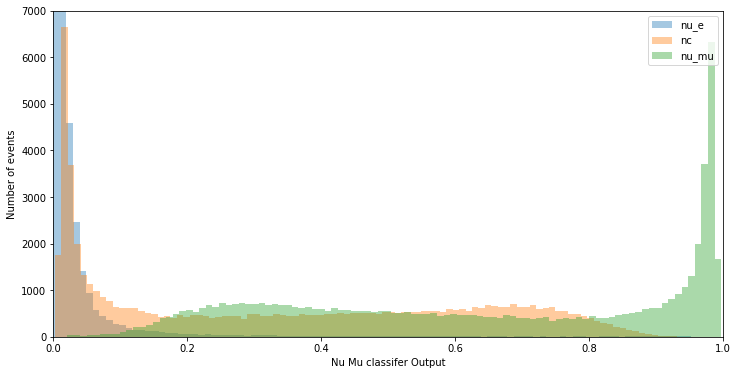

In [10]:
mu_e = []
nc = []
nu_mu = []
for i in range(len(probabilities)):
    if test_vals[i] ==2:
        nc.append(probabilities[i,0])
        mu_e.append(probabilities[i,1])
        nu_mu.append(probabilities[i,2])
        
plt.figure(figsize=(12,6))
g = sns.distplot(mu_e, bins = 100, kde=False)
g = sns.distplot(nc, bins = 100, kde=False)
g = sns.distplot(nu_mu, bins = 100, kde=False)
plt.legend(['nu_e', 'nc',  'nu_mu'], loc='upper right')
plt.xlabel('Nu Mu classifer Output')
plt.ylabel('Number of events')
g.set(ylim=(0,7000))
g.set(xlim=(0,1))

[(0, 1)]

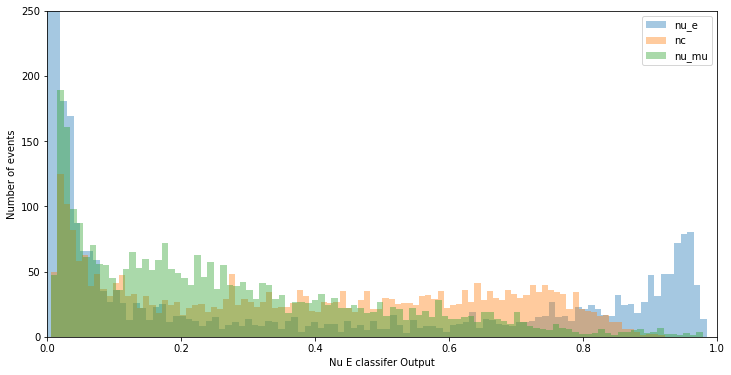

In [11]:
mu_e = []
nc = []
nu_mu = []
for i in range(len(probabilities)):
    if test_vals[i] ==1:
        nc.append(probabilities[i,0])
        mu_e.append(probabilities[i,1])
        nu_mu.append(probabilities[i,2])
        
plt.figure(figsize=(12,6))
g = sns.distplot(mu_e, bins = 100, kde=False)
g = sns.distplot(nc, bins = 100, kde=False)
g = sns.distplot(nu_mu, bins = 100, kde=False)
plt.legend(['nu_e', 'nc',  'nu_mu'], loc='upper right')
plt.xlabel('Nu E classifer Output')
plt.ylabel('Number of events')
g.set(ylim=(0,250))
g.set(xlim=(0,1))

In [ ]:
purity_list = []
efficiency_list = []
p_x_e_list = []

count = 0
for i in test_vals:
    if i==2:
        count+=1

for j in np.linspace(0, 0.99, 100):
    nu_mu_above = []
    nu_mu_below = []
    nc_above = []
    nc_below = []
    nu_e_above = []
    nu_e_below = []
    for i in range(len(probabilities)):
        if test_vals[i] ==2:
            if probabilities[i,2]>=j:
                nu_mu_above.append(probabilities[i,2])
            elif probabilities[i,2]<=j:
                nu_mu_below.append(probabilities[i,2])
            if probabilities[i,0]>=j:
                nc_above.append(probabilities[i,0])
            elif probabilities[i,0]<=j:
                nc_below.append(probabilities[i,0])
            if probabilities[i,1]>=j:
                nu_e_above.append(probabilities[i,1])
            elif probabilities[i,1]<=j:
                nu_e_below.append(probabilities[i,1])  
    purity = len(nu_mu_above)/(len(nc_above)+len(nu_mu_above)+len(nu_e_above))
    purity_list.append(purity)
    
    efficiency = len(nu_mu_above)/(count) 
    efficiency_list.append(efficiency)
    
    p_x_e_list.append(purity*efficiency)

In [ ]:
plt.figure(figsize=(12,6))
plt.plot(purity_list)
plt.plot(efficiency_list)
plt.plot(p_x_e_list)
plt.xlabel('Nu Mu classifer Output')
plt.ylabel('Percentage')
plt.legend(['Purity', 'Efficiency',  'Purity* Efficiency'], loc='lower left')